# ZCurve Functions in pointcloudqueries

We have implemented two functions in the library that allow transformation of uint32 point lists (e.g., Nx3 tensors of uint32) to 3D Zcurve indices. The Z curve is currently mixing 3x16 bits, we can optimize that, but this means it is correct only for uint32_input that fits in uint16 range. For future applications, however, we have already implemented the larger type.

See below how it works

In [2]:
import numpy as np
import pointcloudqueries as pc
from itertools import product
from matplotlib import pyplot as plt

# World to Z Curve
This example generates a 3D grid and shows how to map 3D coordinates onto the 1D curve. In addition, it shows how to
order an array of points and shows that a certain slice in X is a Z curve as well. Note that this Z curve is mixing directoy and not defined for negative numbers. **Therefore, shift your data to the positive world**



In [26]:
n=15
g = np.array([[x,y,z] for x,y,z in  product(range(n),range(n), range(n))],dtype=np.uint32)
print("Z Curve shape: %s " % (str(g.shape)))
zorder = pc.mix3(g)
permutation = np.argsort(zorder[:,0])
g = g[permutation,:]


Z Curve shape: (3375, 3) 


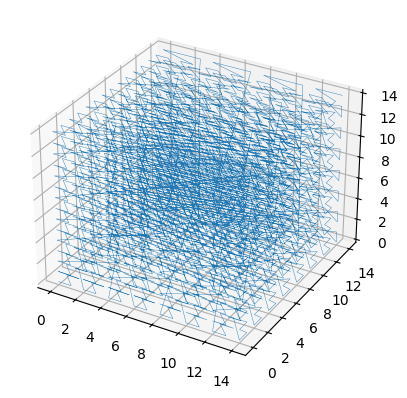

In [27]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot(g[:,0],g[:,1],zs=g[:,2], linewidth=.3)

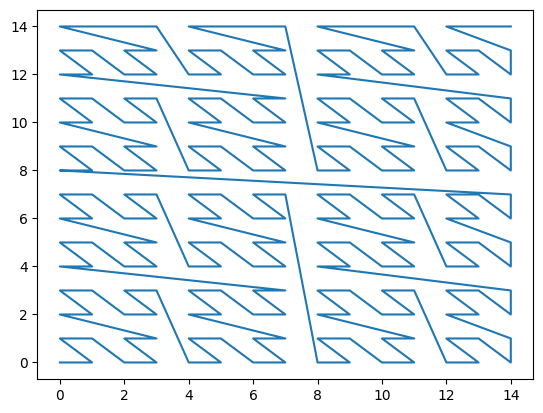

In [28]:
g2 = np.vstack([[x,z] for x,y,z in g if y == 3])
plt.plot(g2[:,0],g2[:,1])

# ZCurve to world
Now, we map back to the world


[[ 0  0  0]
 [ 1  0  0]
 [ 0  1  0]
 ...
 [12 14 14]
 [13 14 14]
 [14 14 14]]


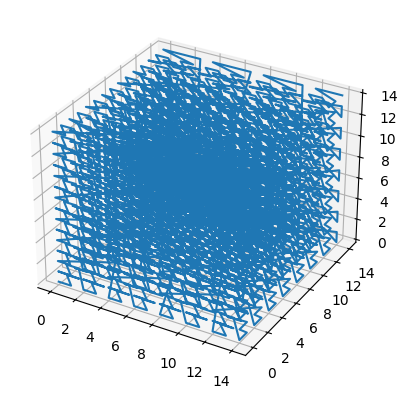

In [29]:
x = pc.unmix3(pc.mix3(g))
print(x)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot(x[:,0],x[:,1],zs=x[:,2])

# Performance
Note that I did not apply any performance optimizations here. There is some thing to optimize, now we use generically generated code...

In [36]:
import timeit
# N random points
#N=1000000
#scale=16000
#points = (scale * (np.random.uniform(size=3*N).reshape(-1,3))).astype(np.uint32)
#plt.scatter(points[:1000,0],points[:1000,1])
setupcode="""
import numpy as np
import pointcloudqueries as pc
N=1000000
scale=16000
points = (scale * (np.random.uniform(size=3*N).reshape(-1,3))).astype(np.uint32)
"""
iter=10
print("Encoding: %.3f per million" %(timeit.timeit('pc.mix3(points)',setup=setupcode,number=iter)/iter))

Encoding: 0.312 per million


In [37]:
setupcode="""
import numpy as np
import pointcloudqueries as pc
N=1000000
scale=16000
points = (scale * (np.random.uniform(size=3*N).reshape(-1,3))).astype(np.uint32)
idx = pc.mix3(points)
"""
iter=10
print("Decoding: %.3f per million" %(timeit.timeit('pc.unmix3(idx)',setup=setupcode,number=iter)/iter))

Decoding: 0.271 per million
